In [0]:
# Build hypothesis and cost

import tensorflow as tf
tf.enable_eager_execution()

x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

W = tf.Variable(2.9)
b = tf.Variable(0.5)

# hypothesis = W * x + b
hypothesis = W * x_data + b


In [0]:
cost = tf.reduce_mean(tf.square(hypothesis - y_data))

In [3]:
# tf.reduce_mean()

v = [1., 2., 3., 4.]
tf.reduce_mean(v)

# tf.square()

tf.square(3)

<tf.Tensor: id=33, shape=(), dtype=int32, numpy=9>

In [4]:
# Gradient descent
# minimize_W,b cost (W, b)

# learning_rate initialize
learning_rate = 0.01

# Gradient descent
with tf.GradientTape() as tape:
  hypothesis = W * x_data + b
  cost = tf.reduce_mean(tf.square(hypothesis - y_data))
  
W_grad, b_grad = tape.gradient(cost, [W, b])

W.assign_sub(learning_rate * W_grad)
b.assign_sub(learning_rate * b_grad)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.376>

    0|    2.4520|    0.3760| 45.660004
   10|    1.1036|    0.0034|  0.206336
   20|    1.0128|   -0.0209|  0.001026
   30|    1.0065|   -0.0218|  0.000093
   40|    1.0059|   -0.0212|  0.000083
   50|    1.0057|   -0.0205|  0.000077
   60|    1.0055|   -0.0198|  0.000072
   70|    1.0053|   -0.0192|  0.000067
   80|    1.0051|   -0.0185|  0.000063
   90|    1.0050|   -0.0179|  0.000059


(0, 8)

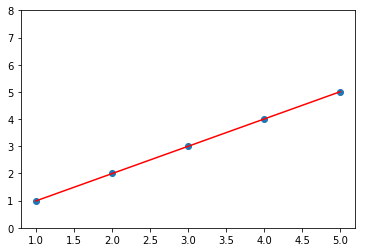

In [6]:
import matplotlib.pyplot as plt

# Parameter (W, b) Update
W = tf.Variable(2.9)
b = tf.Variable(0.5)

for i in range(100):
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    if i % 10 == 0:
      print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

plt.plot(x_data, y_data, 'o')
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.ylim(0, 8)